In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import mstats

train_data = pd.read_csv('./GiveMeSomeCredit/cs-training.csv')
test_data = pd.read_csv('./GiveMeSomeCredit/cs-test.csv')

median_monthly_income = train_data['MonthlyIncome'].median()
train_data['MonthlyIncome'] = train_data['MonthlyIncome'].fillna(median_monthly_income)
train_data['NumberOfDependents'] = train_data['NumberOfDependents'].fillna(0)

summary_statistics = train_data.describe()
missing_values = train_data.isnull().sum()
summary_statistics.loc['missing'] = missing_values
summary_statistics

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.418455e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.289040e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000
missing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000


## Data Dictionary:

SeriousDlqin2yrs: Person experienced 90 days past due delinquency or worse

RevolvingUtilizationOfUnsecuredLines: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

age: Age of borrower in years

NumberOfTime30-59DaysPastDueNotWorse: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

DebtRatio: Monthly debt payments, alimony,living costs divided by monthy gross income

MonthlyIncome: Monthly income

NumberOfOpenCreditLinesAndLoans: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

NumberOfTimes90DaysLate: Number of times borrower has been 90 days or more past due.

NumberRealEstateLoansOrLines: Number of mortgage and real estate loans including home equity lines of credit

NumberOfTime60-89DaysPastDueNotWorse: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

NumberOfDependents: Number of dependents in family excluding themselves (spouse, children etc.)

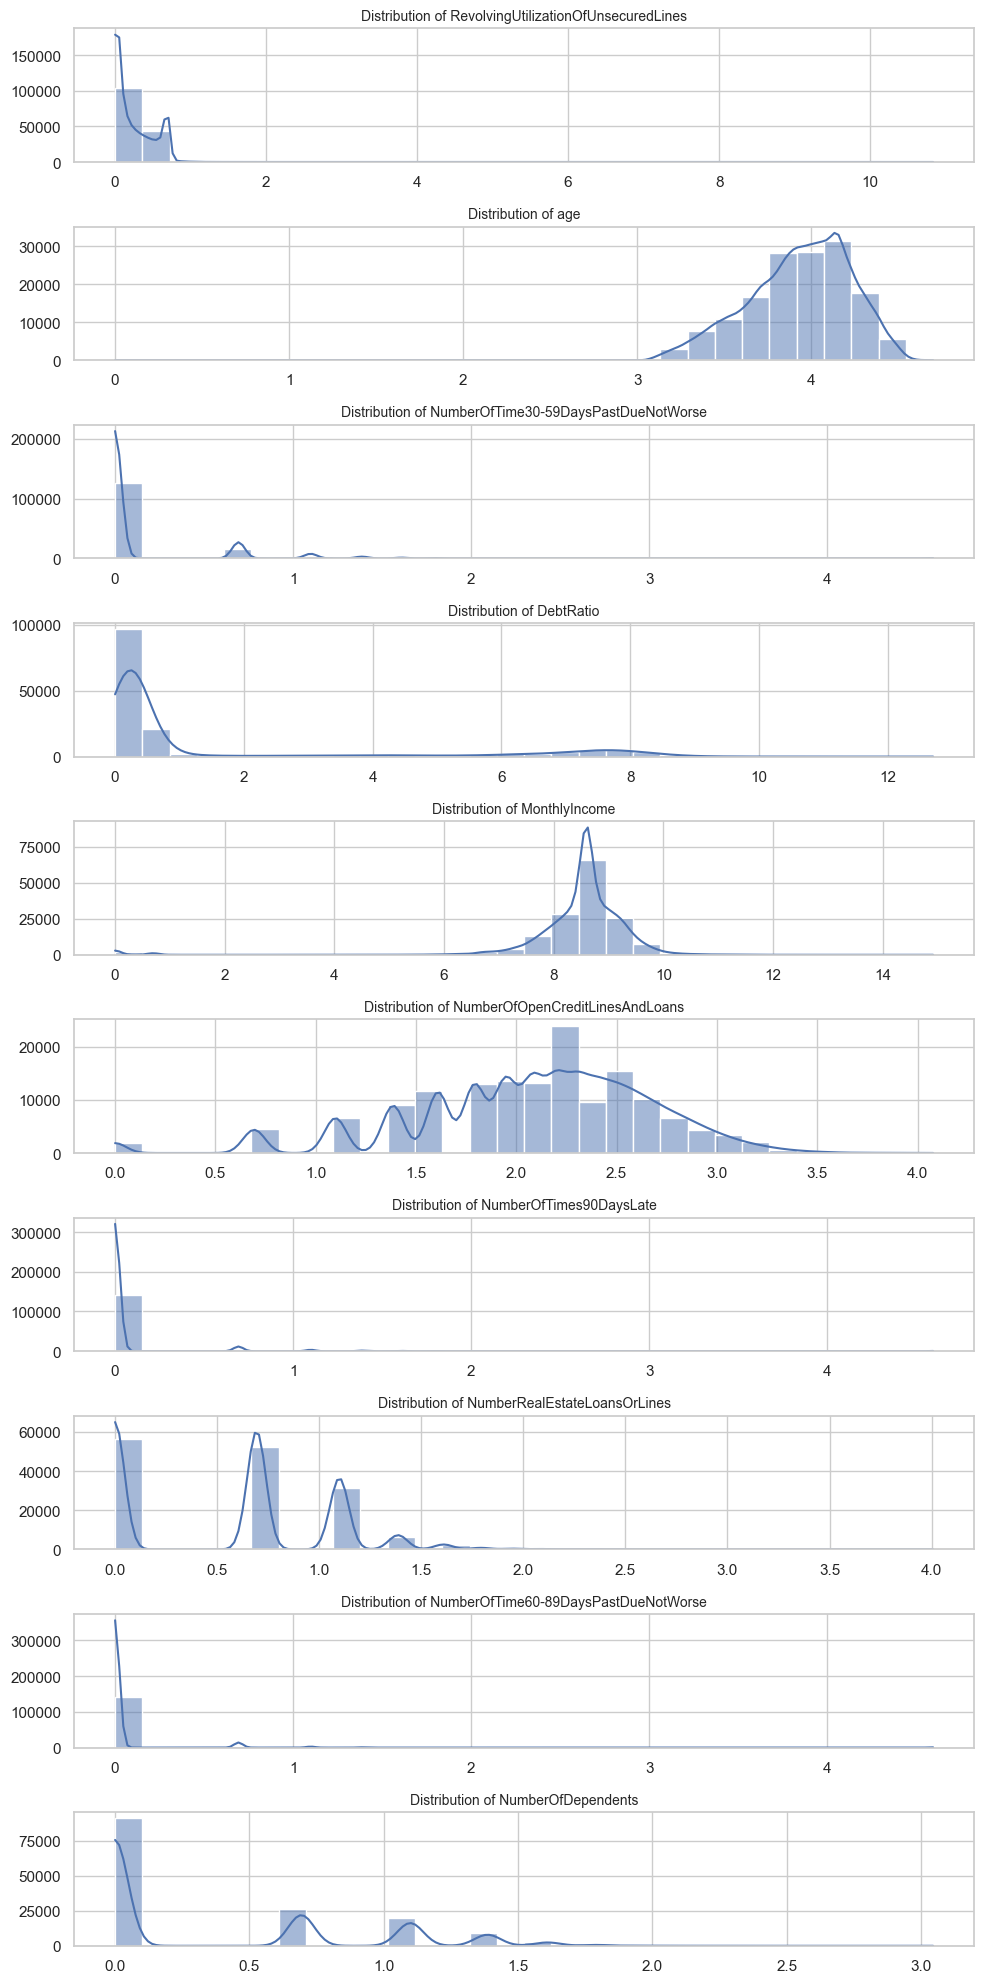

In [3]:
log_transformed_train_data = train_data.copy()
for column in log_transformed_train_data.columns[2:]:
    log_transformed_train_data[column] = np.log1p(log_transformed_train_data[column])

sns.set(style="whitegrid")

columns_to_plot = log_transformed_train_data.columns[2:]

fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, 20))

for i, col in enumerate(columns_to_plot):
    sns.histplot(log_transformed_train_data[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [8]:
y = log_transformed_train_data['SeriousDlqin2yrs']
X = log_transformed_train_data.drop(['SeriousDlqin2yrs', 'Unnamed: 0'], axis=1)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
scaled_data = pd.concat([X_scaled, y], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

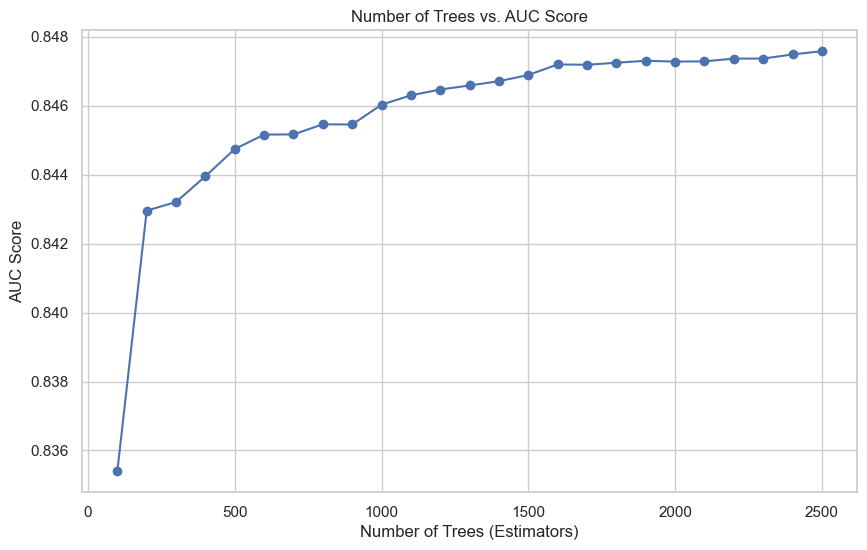

Best number of estimators: 2500
Best AUC score: 0.8476


In [22]:
n_estimators_range = range(100, 2600, 100)  
auc_scores = []

for n_estimators in n_estimators_range:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc_score)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, auc_scores, marker='o')
plt.title('Number of Trees vs. AUC Score')
plt.xlabel('Number of Trees (Estimators)')
plt.ylabel('AUC Score')
plt.grid(True)
plt.show()

best_n_estimators = n_estimators_range[np.argmax(auc_scores)]
print(f"Best number of estimators: {best_n_estimators}")
print(f"Best AUC score: {max(auc_scores):.4f}")

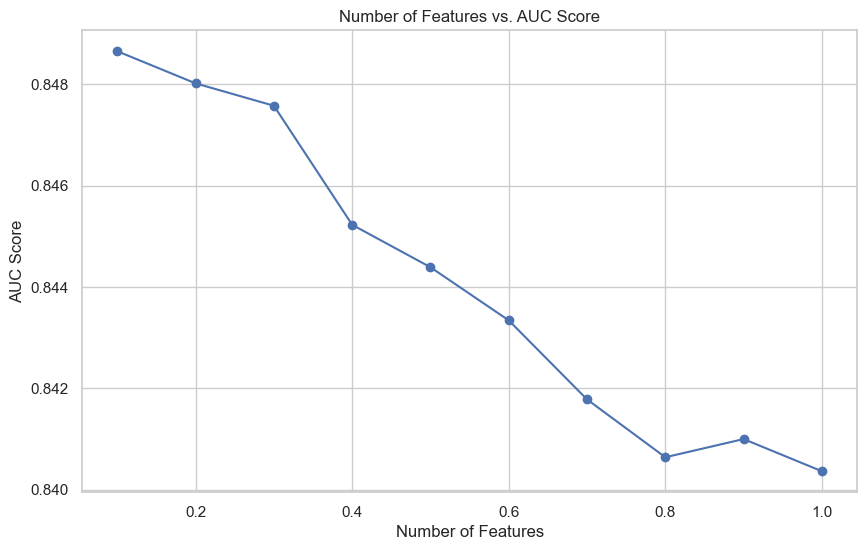

Best max_features: 2500
Best AUC score: 0.8487


In [28]:
m_range = np.arange(0.1, 1.1, 0.1)
auc_scores = []

for m in m_range:
    rf_classifier = RandomForestClassifier(n_estimators=2500, max_features=m, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc_score)

plt.figure(figsize=(10, 6))
plt.plot(m_range, auc_scores, marker='o')
plt.title('Number of Features vs. AUC Score')
plt.xlabel('Number of Features')
plt.ylabel('AUC Score')
plt.grid(True)
plt.show()

best_m_estimators = m_range[np.argmax(auc_scores)]
print(f"Best max_features: {best_n_estimators}")
print(f"Best AUC score: {max(auc_scores):.4f}")

In [29]:
n_features = X_train.shape[1]
rf_classifier = RandomForestClassifier(n_estimators=2500, max_features=0.1, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_features=0.1, n_estimators=2500, random_state=42)

In [30]:
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {auc_score}")

ROC AUC Score: 0.8486562818754871


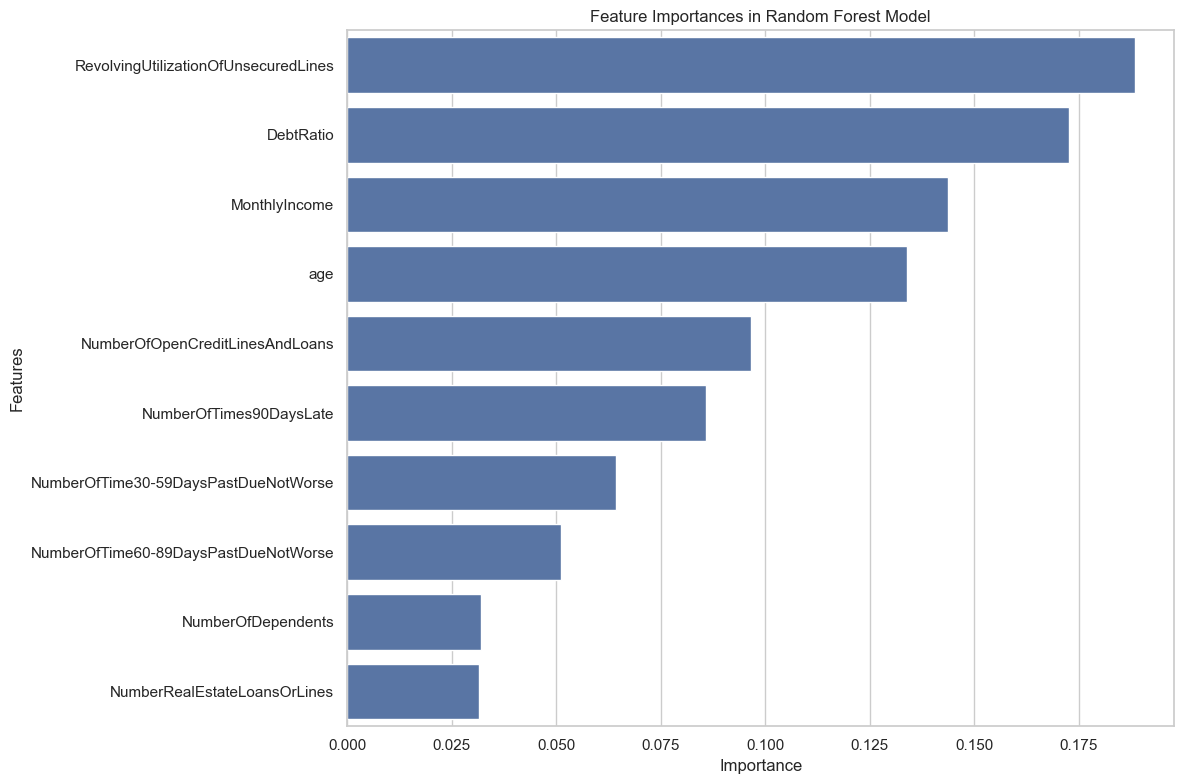

In [31]:
importances = rf_classifier.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

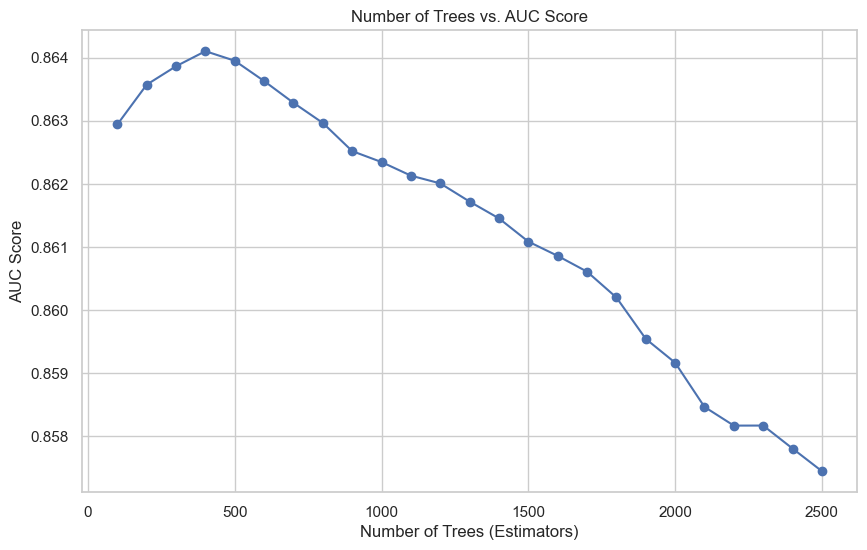

Best number of estimators: 400
Best AUC score: 0.8641


In [33]:
n_estimators_range = range(100, 2600, 100)  
auc_scores = []

for n_estimators in n_estimators_range:
    gb_classifier = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
    gb_classifier.fit(X_train, y_train)
    
    y_pred_proba = gb_classifier.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc_score)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, auc_scores, marker='o')
plt.title('Number of Trees vs. AUC Score')
plt.xlabel('Number of Trees (Estimators)')
plt.ylabel('AUC Score')
plt.grid(True)
plt.show()

best_n_estimators = n_estimators_range[np.argmax(auc_scores)]
print(f"Best number of estimators: {best_n_estimators}")
print(f"Best AUC score: {max(auc_scores):.4f}")

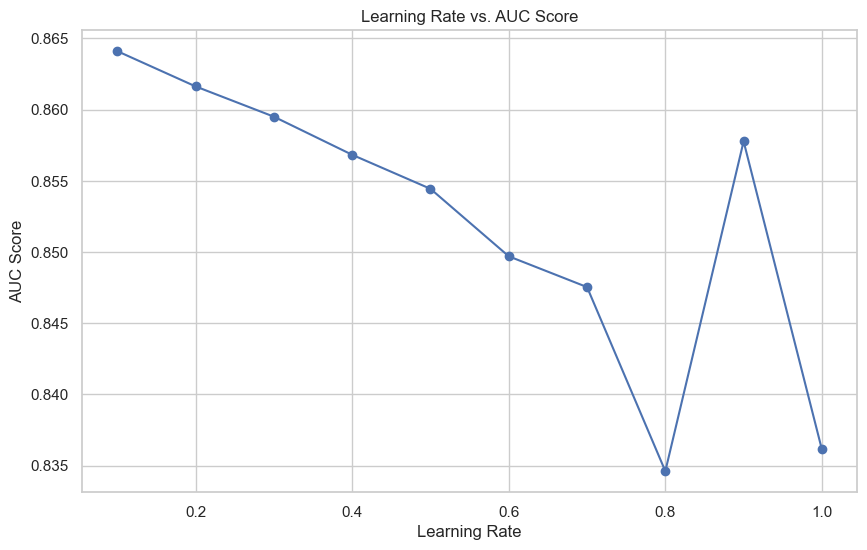

Best learning rate: 0.1
Best AUC score: 0.8641


In [34]:
learning_rate_range = np.arange(0.1, 1.1, 0.1)
auc_scores = []

for learning_rate in learning_rate_range:
    gb_classifier = GradientBoostingClassifier(n_estimators=400, learning_rate=learning_rate, random_state=42)
    gb_classifier.fit(X_train, y_train)
    
    y_pred_proba = gb_classifier.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc_score)

plt.figure(figsize=(10, 6))
plt.plot(learning_rate_range, auc_scores, marker='o')
plt.title('Learning Rate vs. AUC Score')
plt.xlabel('Learning Rate')
plt.ylabel('AUC Score')
plt.grid(True)
plt.show()

best_learning_rate = learning_rate_range[np.argmax(auc_scores)]
print(f"Best learning rate: {best_learning_rate}")
print(f"Best AUC score: {max(auc_scores):.4f}")

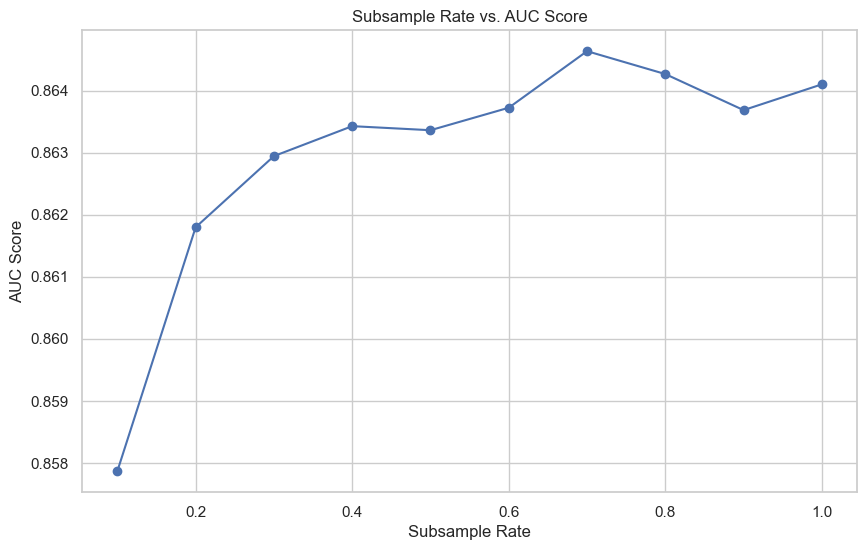

Best subsample rate: 0.7000000000000001
Best AUC score: 0.8646


In [36]:
subsample_range = np.arange(0.1, 1.1, 0.1)
auc_scores = []

for subsample in subsample_range:
    gb_classifier = GradientBoostingClassifier(n_estimators=400, learning_rate=0.1, subsample=subsample, random_state=42)
    gb_classifier.fit(X_train, y_train)
    
    y_pred_proba = gb_classifier.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc_score)

plt.figure(figsize=(10, 6))
plt.plot(subsample_range, auc_scores, marker='o')
plt.title('Subsample Rate vs. AUC Score')
plt.xlabel('Subsample Rate')
plt.ylabel('AUC Score')
plt.grid(True)
plt.show()

best_subsample = subsample_range[np.argmax(auc_scores)]
print(f"Best subsample rate: {best_subsample}")
print(f"Best AUC score: {max(auc_scores):.4f}")

In [37]:
gb_classifier = GradientBoostingClassifier(n_estimators=400, learning_rate=0.1, subsample=0.7, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_proba = gb_classifier.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {auc_score}")

ROC AUC Score: 0.8646361097329087


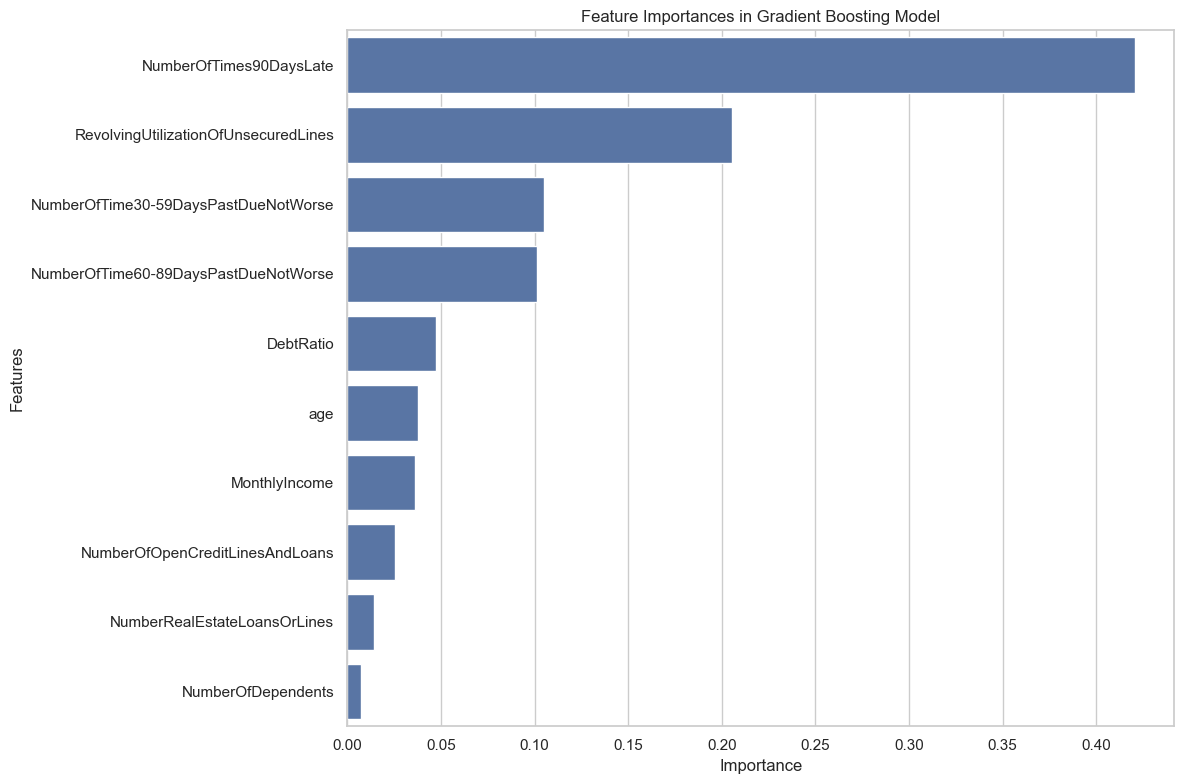

In [43]:
importances = gb_classifier.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importances in Gradient Boosting Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [42]:
median_monthly_income = test_data['MonthlyIncome'].median()
test_data['MonthlyIncome'] = test_data['MonthlyIncome'].fillna(median_monthly_income)
test_data['NumberOfDependents'] = test_data['NumberOfDependents'].fillna(0)
log_transformed_test_data = test_data.copy()
for column in log_transformed_test_data.columns[2:]:
    log_transformed_test_data[column] = np.log1p(log_transformed_test_data[column])
X_testing = log_transformed_test_data.drop(['SeriousDlqin2yrs', 'Unnamed: 0'], axis=1)
scaler = RobustScaler()
scaled_test_data = scaler.fit_transform(X_testing)
scaled_test_data = pd.DataFrame(scaled_test_data, columns=X_testing.columns)
test_probabilities = gb_classifier.predict_proba(scaled_test_data)[:, 1]
submission_df = pd.DataFrame({
    'Id': test_data['Unnamed: 0'], 
    'Probability': test_probabilities
})
submission_df.to_csv('submission.csv', index=False)